# Principal Component Analysis (PCA)

**Objectives:**
* Introduction to PCA
* Use of PCA in information extraction
* Using PCA to create a new portfolio
* Test performance of PCA suggested portfolio

In [ ]:
! pip install yfinance

     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 18.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests

In [ ]:
plt.style.use('bmh')

In [ ]:
# Scrap sp500 tickers
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))
        
    return tickers

tickers = save_sp500_tickers()

In [ ]:
prices = yf.download(tickers, start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  502 of 502 completed


In [ ]:
rs = prices.apply(np.log).diff(1)

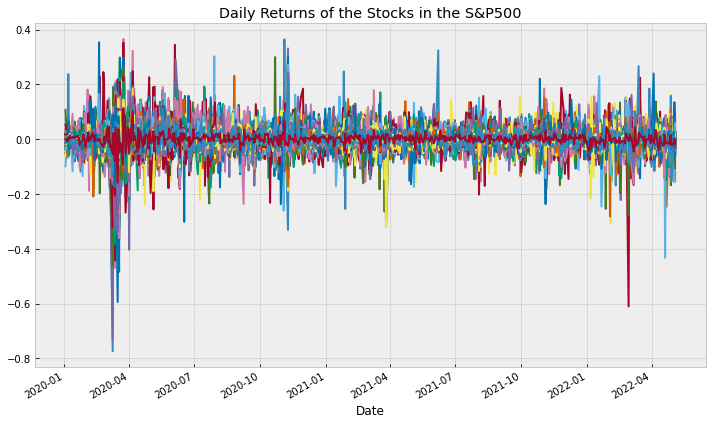

In [ ]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
#plt.savefig('tmp.png')

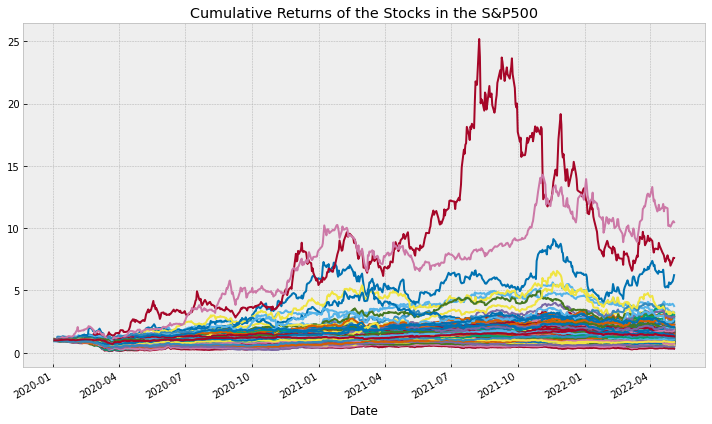

In [ ]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P500')
plt.tight_layout()
#plt.savefig('tmp.png')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(1).fit(rs.fillna(0))

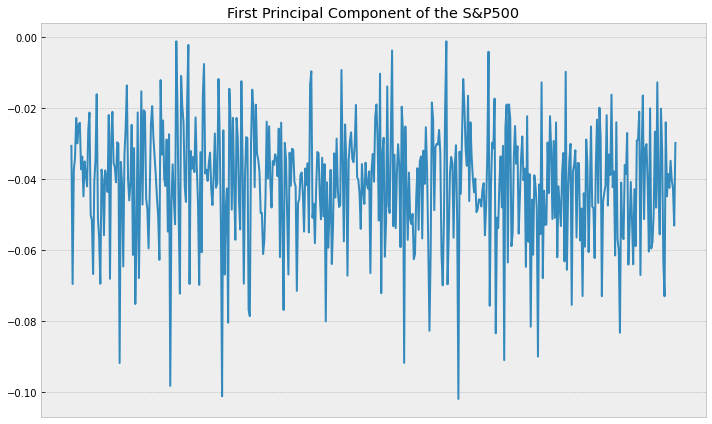

In [ ]:
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

In [ ]:
pc1

A      -0.030589
AAL    -0.069547
AAP    -0.037373
AAPL   -0.034057
ABBV   -0.022715
          ...   
YUM    -0.034778
ZBH    -0.040334
ZBRA   -0.042590
ZION   -0.053057
ZTS    -0.029750
Length: 502, dtype: float64

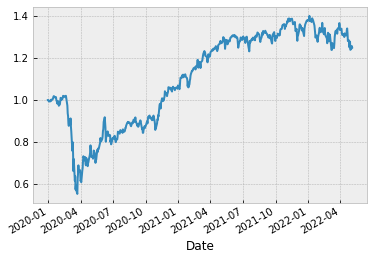

In [ ]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [ ]:
prices = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


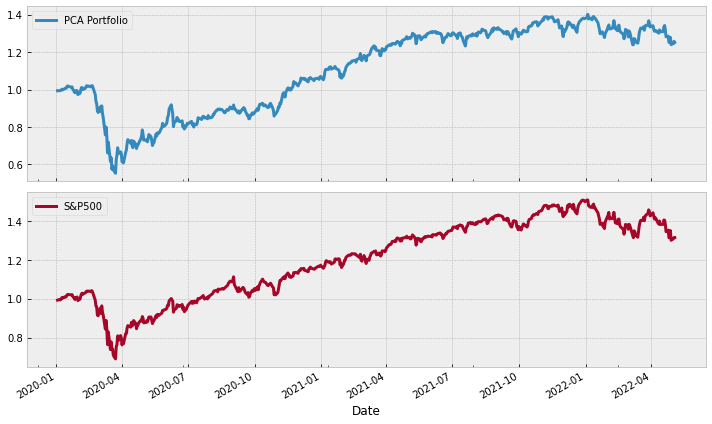

In [ ]:
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')

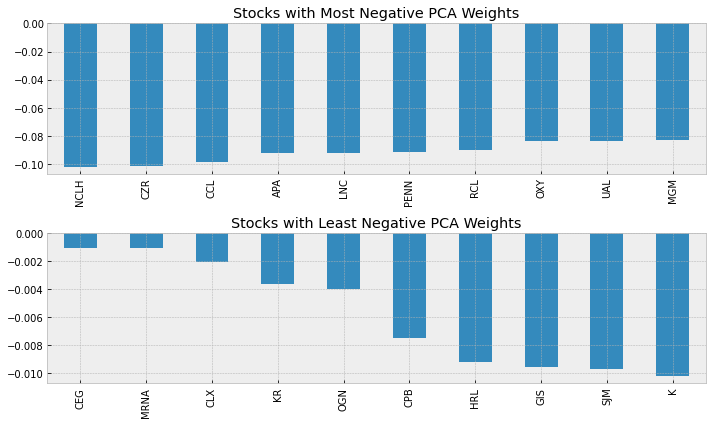

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.savefig('tmp.png')

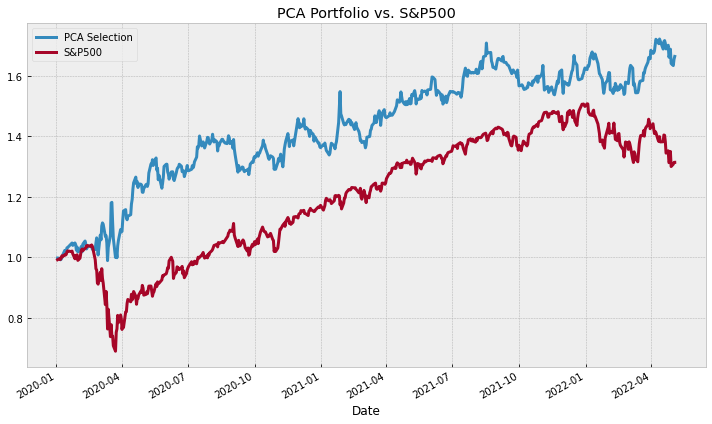

In [ ]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()
plt.savefig('tmp.png')

#This looks amazing, but shouldn't you be asking me a question here?


#Bonus point if you ask me the correct question.

In [ ]:
rs_2021=rs.loc[:'2021-12-31']
prices_2021=prices.loc[:'2021-12-31']
pca = PCA(1).fit(rs_2021.fillna(0))
pc1_2021 = pd.Series(index=rs.columns, data=pca.components_[0])

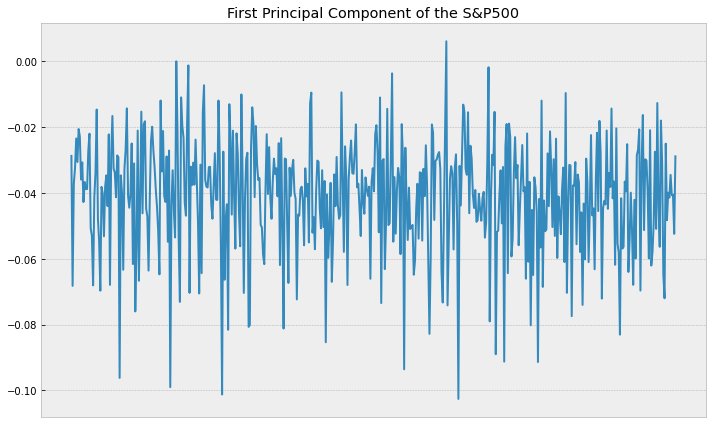

In [ ]:
pc1_2021.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()
#plt.savefig('tmp.png')

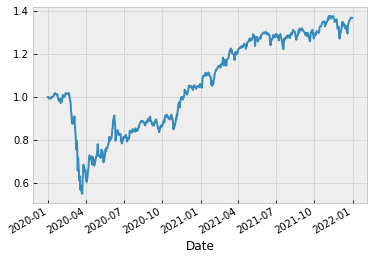

In [ ]:
weights_new = abs(pc1_2021)/sum(abs(pc1_2021))
myrs_2021 = (weights_new*rs_2021).sum(1)
myrs_2021.cumsum().apply(np.exp).plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


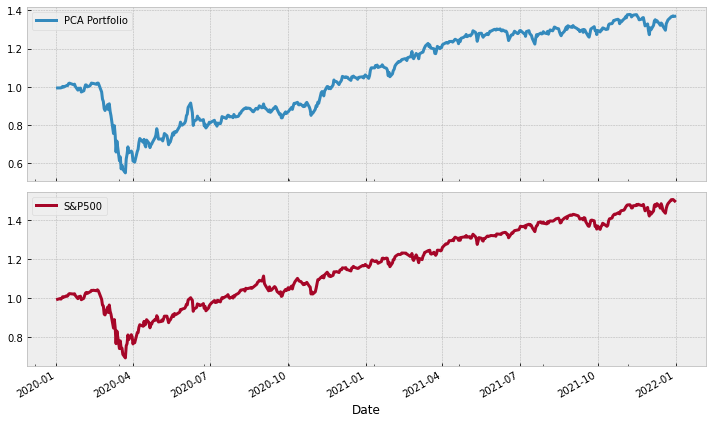

In [ ]:
rs_df_new = pd.concat([myrs_2021, prices_2021.apply(np.log).diff(1)], 1)
rs_df_new.columns = ["PCA Portfolio", "S&P500"]
rs_df_new.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
#plt.savefig('tmp.png')

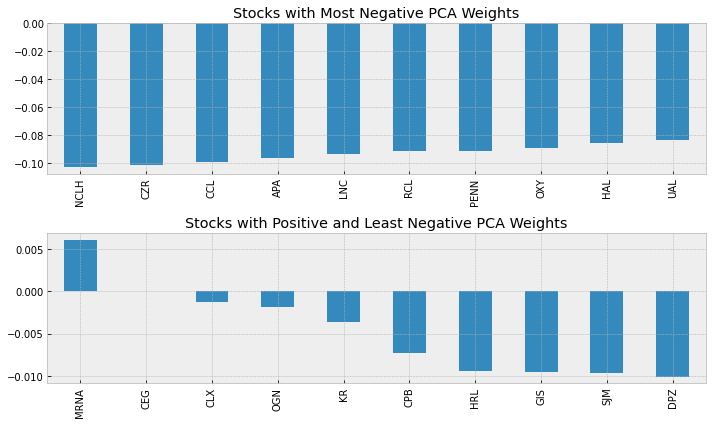

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1_2021.nsmallest(10).plot.bar(ax=ax[0], grid=True, title='Stocks with Most Negative PCA Weights')
pc1_2021.nlargest(10).plot.bar(ax=ax[1], grid=True, title='Stocks with Positive and Least Negative PCA Weights')

plt.tight_layout()
#plt.savefig('tmp.png')

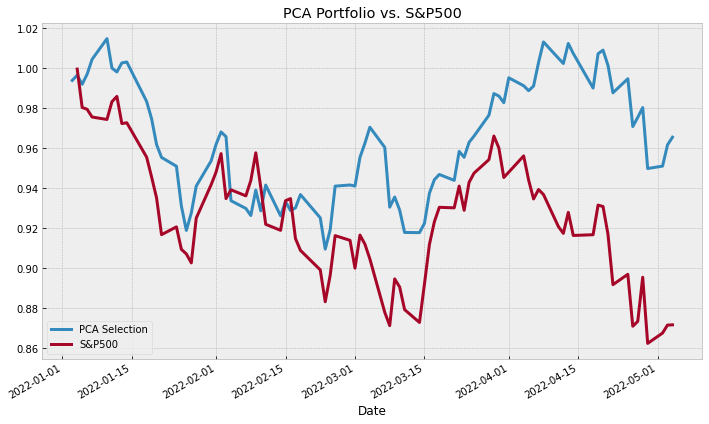

In [ ]:
myrs = rs[pc1_2021.nlargest(10).index].mean(1)
myrs=myrs.loc['2022-01-01':]
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
prices['2022-01-01':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()
plt.savefig('tmp.png')

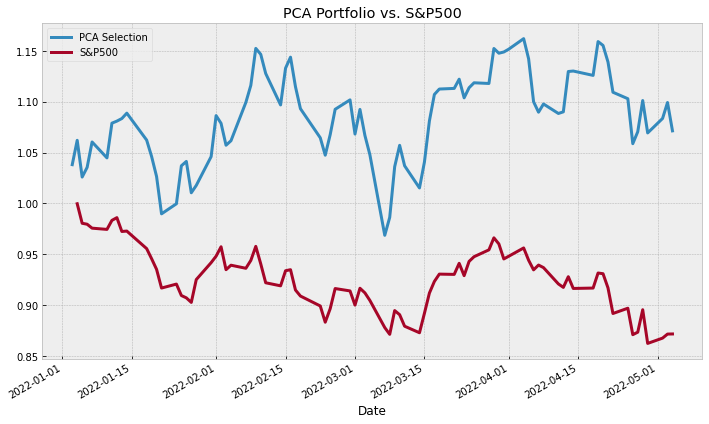

In [ ]:
myrs = rs[pc1_2021.nsmallest(10).index].mean(1)
myrs=myrs.loc['2022-01-01':]
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
prices['2022-01-01':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()
plt.savefig('pca_portfolio.pdf')

$R_{i,t} = \alpha + \beta \cdot R_{m,t}-R_{f,t}$